<a href="https://colab.research.google.com/github/BehzadBarati/Ingredient-Maps/blob/main/Food_Recipes_recipe_scrapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abstract:

This notebook practices elementary functions of recipe-scrapers library which facilitates scraping of food websites. Also a brief comparision with RecipeNLG dataset is provided. 
___
Source:

My main refrences are [recipe-scrapers](https://pypi.org/project/recipe-scrapers/) library and [RecipeNLG](https://recipenlg.cs.put.poznan.pl) dataset.
___
Input:


1- [list](https://) of used websites in RecipeNLG 

2- list of available websites in recipe-scrappers library. (copied from source)

Ouput:

1- recipe-scrapers vs. RecipeING dataset comparision (Inline)

___
Hints:

1_ .


# Install and import libraries

In [ ]:
# !pip install recipe-scrapers
from recipe_scrapers import scrape_me           # Scraping library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch            # To customize legend in plots
from PIL import Image                           # To display food image from URL
import requests                                 # To display food image from URL
from io import BytesIO                          # To display food image from URL
from google.colab import drive                  # Mount google drive to colab notebook

# Practice some important methods of library


In [60]:
# Give the url as a string.
scraper = scrape_me('https://www.food.com/recipe/bacon-wrapped-scallops-49506')

In [61]:
scraper.title()

'Bacon Wrapped Scallops'

In [62]:
scraper.total_time()

32

In [63]:
scraper.yields()

''

In [64]:
scraper.ingredients()

['2 lbs bacon (regular sliced, not thick)',
 '2 lbs sea scallops (if very large, cut in half)',
 '3 tablespoons butter',
 '1 tablespoon minced garlic',
 '1⁄3 cup chicken broth']

In [65]:
scraper.instructions()

'Cut bacon strips in half.\nWrap a piece of bacon around each scallop; secure with toothpick.\nArrange the wrapped scallops on a baking sheet.\nBroil 5 inches from heat for 3 minutes per side, or until bacon is crisp.\nIn small skillet, melt butter; add garlic and saute 1 minute,.\nAdd broth and bring to a boil.\nCook 2 minutes.\nPlace scallops in large bowl; pour broth over, Gently toss to coat.'

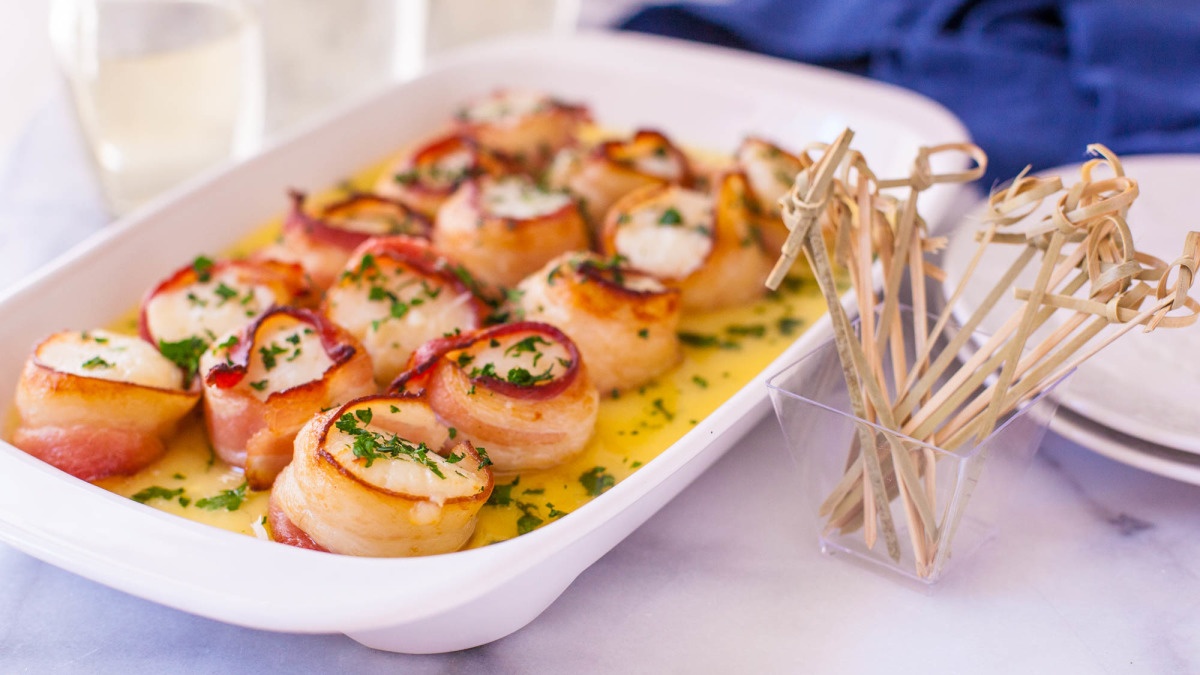

In [66]:
#scraper.image() generate URL of picture.
url = scraper.image()
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [67]:
scraper.host()

'food.com'

In [14]:
# scraper.links() returns a list of dictionaries containing all of the <a> tag attributes.
# The attribute names are the dictionary keys.
print("Number of items in scraper.links() is : " , len(scraper.links()))
print("\nAn example of dictionaries:\n")
scraper.links()[363]

Number of items in scraper.links() is :  420

An example of dictionaries:



{'class': ['full-logo'], 'data-action': 'footer-logo', 'href': '/'}

# Websites in recipe-scrapers vs. RecipeING dataset

## Load inputs

In [15]:
# scraper list is copied from the source i mentiond at the beginning the file (2021/02/05)
# RecipieNLG list is read from my google cloud drive with name of Websites-RecipieNLG.csv
# RecipieNLG list is also available in this repository: https://github.com/BehzadBarati/Ingredient-Maps

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [16]:
cd gdrive/MyDrive/Projects/Ingredient-Maps/Phase1/reports

/content/gdrive/MyDrive/Projects/Ingredient-Maps/Phase1/reports


In [32]:
websites_NLG = pd.read_csv('./Websites-RecipeNLG.csv')
websites_scraper = "https://101cookbooks.com/ https://www.750g.com https://claudia.abril.com.br/ https://www.acouplecooks.com https://allrecipes.com/ https://amazingribs.com/ https://ambitiouskitchen.com/ https://archanaskitchen.com/ https://www.atelierdeschefs.fr/ https://averiecooks.com/ https://bakingmischief.com/ https://bbc.com/ https://bbc.co.uk/ https://bbcgoodfood.com/ https://bettycrocker.com/ https://blueapron.com/ https://bonappetit.com/ https://bowlofdelicious.com/ https://budgetbytes.com/ https://cdkitchen.com/ https://chefkoch.de/ https://closetcooking.com/ https://cookeatshare.com/ https://cookieandkate.com/ https://cookpad.com/ https://cookstr.com/ https://copykat.com/ https://countryliving.com/ https://cuisineaz.com/ https://cybercook.com.br/ https://delish.com/ https://domesticate-me.com/ https://downshiftology.com/ https://www.dr.dk/ https://www.eatingbirdfood.com/ https://eatsmarter.com/ https://eatsmarter.de/ https://eatwhattonight.com/ https://epicurious.com/ https://recipes.farmhousedelivery.com/ https://fifteenspatulas.com/ https://finedininglovers.com/ https://fitmencook.com/ https://food.com/ https://foodandwine.com/ https://foodnetwork.com/ https://foodrepublic.com/ https://geniuskitchen.com/ https://giallozafferano.it/ https://gimmesomeoven.com/ https://recietas.globo.com/ https://gonnawantseconds.com/ https://gousto.co.uk/ https://greatbritishchefs.com/ https://halfbakedharvest.com/ https://www.hassanchef.com/ https://www.heb.com/ https://heinzbrasil.com.br/ https://hellofresh.com/ https://hellofresh.co.uk/ https://www.hellofresh.de/ https://hostthetoast.com/ https://receitas.ig.com.br/ https://indianhealthyrecipes.com https://inspiralized.com/ https://jamieoliver.com/ https://justbento.com/ https://kennymcgovern.com/ https://www.kingarthurbaking.com https://kochbar.de/ https://kuchnia-domowa.pl/ https://littlespicejar.com/ http://livelytable.com/ https://lovingitvegan.com/ https://lecremedelacrumb.com/ https://marmiton.org/ https://matprat.no/ https://www.melskitchencafe.com/ http://mindmegette.hu/ https://minimalistbaker.com/ https://misya.info/ https://momswithcrockpots.com/ http://motherthyme.com/ https://mybakingaddiction.com/ https://myrecipes.com/ https://healthyeating.nhlbi.nih.gov/ https://nourishedbynutrition.com/ https://nutritionbynathalie.com/blog https://cooking.nytimes.com/ https://ohsheglows.com/ https://www.paleorunningmomma.com/ https://www.panelinha.com.br/ https://paninihappy.com/ https://popsugar.com/ https://przepisy.pl/ https://purelypope.com/ https://purplecarrot.com/ https://rachlmansfield.com/ https://realsimple.com/ https://recipietineats.com/ https://seriouseats.com/ https://simplyquinoa.com/ https://simplyrecipes.com/ https://simplywhisked.com/ https://skinnytaste.com/ https://southernliving.com/ https://spendwithpennies.com/ https://www.thespruceeats.com/ https://steamykitchen.com/ https://streetkitchen.hu/ https://sunbasket.com/ https://sweetpeasandsaffron.com/ https://tastesoflizzyt.com https://tasteofhome.com https://tasty.co https://tastykitchen.com/ https://thehappyfoodie.co.uk/ https://thekitchn.com/ https://thenutritiouskitchen.co/ https://thepioneerwoman.com/ https://thespruceeats.com/ https://thevintagemixer.com/ https://thewoksoflife.com/ https://tine.no/ https://tudogostoso.com.br/ https://twopeasandtheirpod.com/ https://vanillaandbean.com/ https://vegolosi.it/ https://vegrecipesofindia.com/ https://watchwhatueat.com/ https://whatsgabycooking.com/ https://en.wikibooks.org/ https://yummly.com/"

In [33]:
# Since some URLs have "www" and others do not, I trimmed them.

websites_scraper = websites_scraper.split(sep=" ")
for i in range(len(websites_scraper)):
    if websites_scraper[i][8:11] == "www":
        websites_scraper[i] = websites_scraper[i][12:].split(".")[0]
    else:
        websites_scraper[i] = websites_scraper[i][8:].split(".")[0]

print("first 5 websites:\n", websites_scraper[:5])
print("\nNumber of websites in scraper lib: ", len(set(websites_scraper)))

first 5 websites:
 ['101cookbooks', '750g', 'claudia', 'acouplecooks', 'allrecipes']

Number of websites in scraper lib:  128


## Compare

In [38]:
# Make new column in website_NLG table for indicating if recipie-scrapper lib supports 

websites_NLG['recipie-scraper support'] = websites_NLG['websites'].isin(websites_scraper)

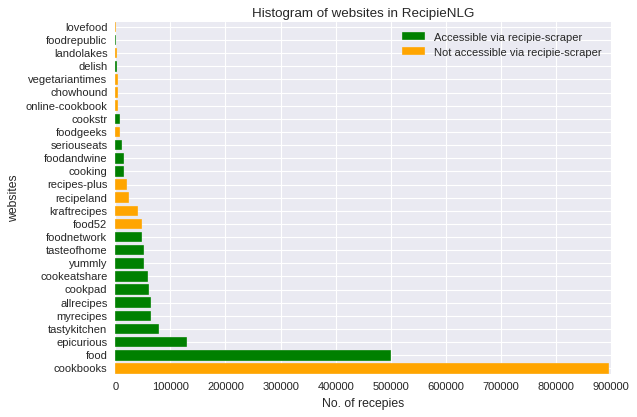

In [59]:
plt.style.use('seaborn') 

colors = {True: 'green', False: 'orange'}
plt.figure()
plt.barh(websites_NLG['websites'], websites_NLG['No. of recipies'], color=websites_NLG['recipie-scraper support'].map(colors))
plt.legend([Patch(facecolor=colors[True]), Patch(facecolor=colors[False])], ["Accessible via recipie-scraper", "Not accessible via recipie-scraper"])
plt.title("Histogram of websites in RecipieNLG")
plt.xlabel("No. of recepies")
plt.ylabel("websites")
plt.show()

In [37]:
websites_NLG

,websites,No. of recipies,recipie-scraper support
0,cookbooks,896341,False
1,food,499616,True
2,epicurious,129444,True
3,tastykitchen,78768,True
4,myrecipes,64895,True
5,allrecipes,64602,True
6,cookpad,61020,True
7,cookeatshare,59307,True
8,yummly,51963,True
9,tasteofhome,51594,True
